In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , roc_auc_score , roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb


In [8]:
df = pd.read_csv("data\prain.csv")
df.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
df.Target.unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [5]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [12]:
le = LabelEncoder()

df.Target = le.fit_transform(df.Target)

In [13]:
df.Target

0        2
1        0
2        0
3        1
4        2
        ..
76513    2
76514    2
76515    1
76516    0
76517    2
Name: Target, Length: 76518, dtype: int32

In [16]:
for feature in df.columns:
  correlation = df[feature].corr(df['Target'], method='pearson')
  print(f"correlation of {feature} with target is: {correlation}")

correlation of id with target is: 0.0014106466702286937
correlation of Marital status with target is: -0.12309252880598621
correlation of Application mode with target is: -0.3248303131539275
correlation of Application order with target is: 0.12839428482356732
correlation of Course with target is: 0.1542080785206281
correlation of Daytime/evening attendance with target is: 0.1244841192846673
correlation of Previous qualification with target is: -0.09231872490195225
correlation of Previous qualification (grade) with target is: 0.13811884617034995
correlation of Nacionality with target is: -0.0047224315759094556
correlation of Mother's qualification with target is: -0.08505640345469663
correlation of Father's qualification with target is: -0.012448703207081795
correlation of Mother's occupation with target is: -0.04315650691802542
correlation of Father's occupation with target is: -0.03264604598072655
correlation of Admission grade with target is: 0.17288009282126907
correlation of Displa

correlation of id with target is: 0.0014106466702286937


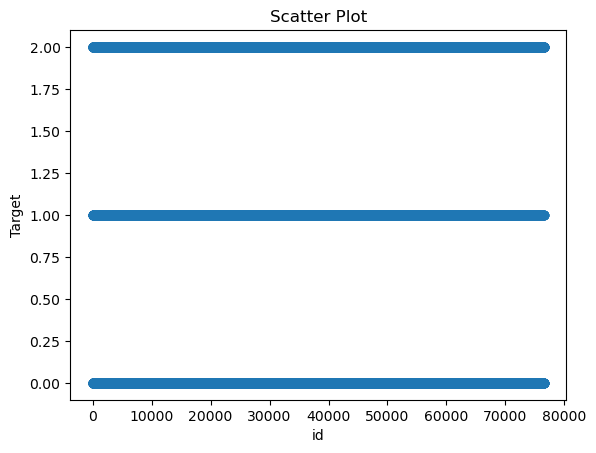

correlation of Marital status with target is: -0.12309252880598621


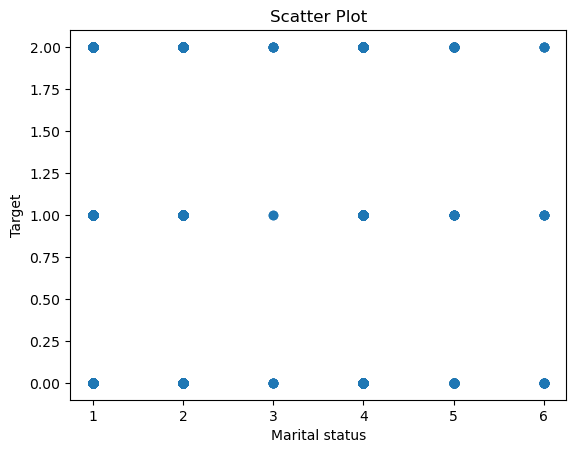

correlation of Application mode with target is: -0.3248303131539275


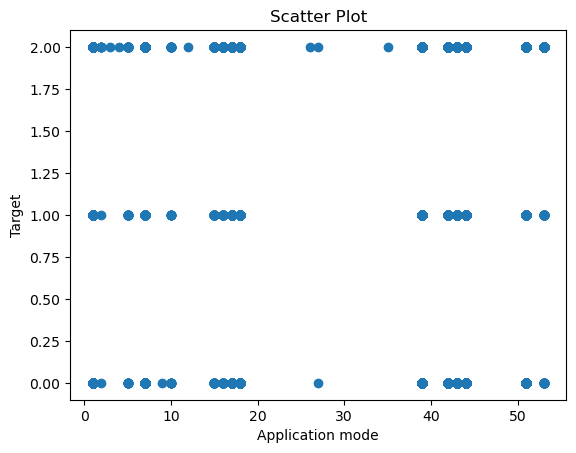

correlation of Application order with target is: 0.12839428482356732


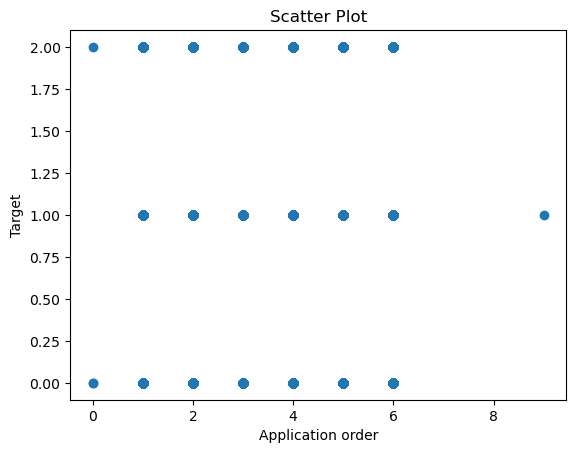

correlation of Course with target is: 0.1542080785206281


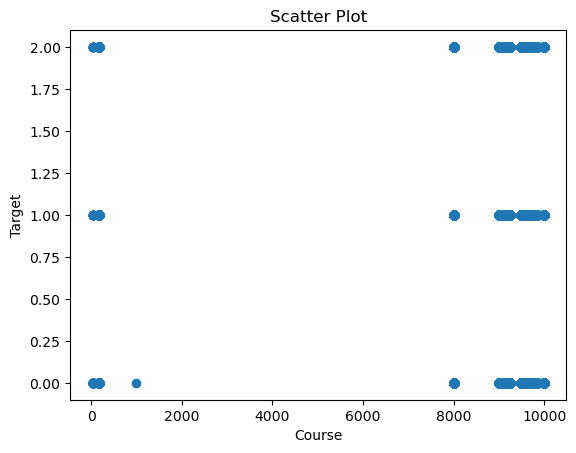

correlation of Daytime/evening attendance with target is: 0.1244841192846673


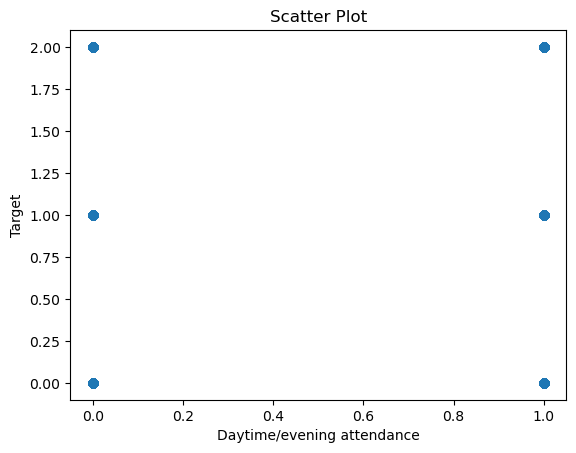

correlation of Previous qualification with target is: -0.09231872490195225


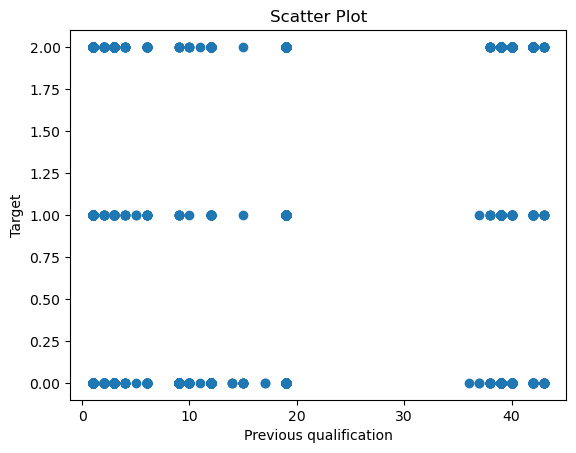

correlation of Previous qualification (grade) with target is: 0.13811884617034995


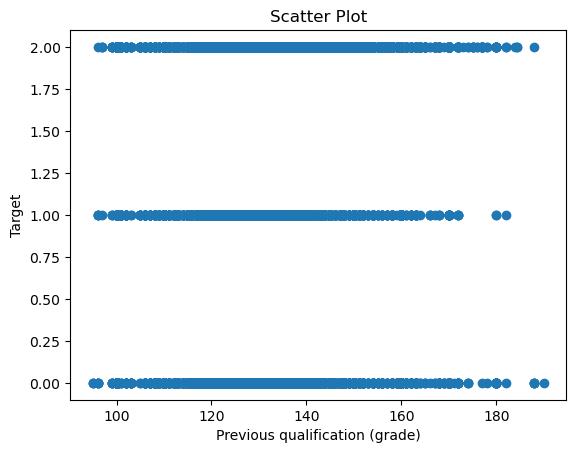

correlation of Nacionality with target is: -0.0047224315759094556


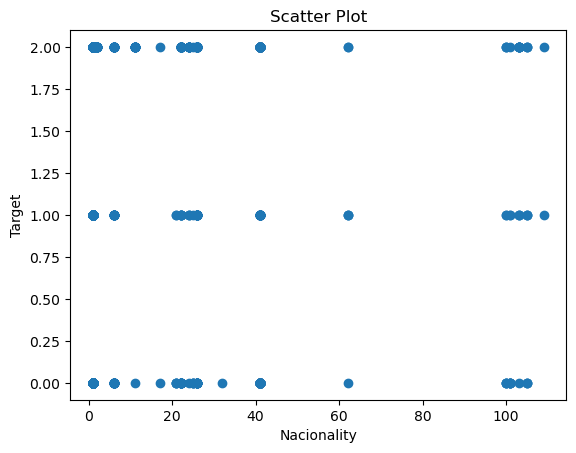

correlation of Mother's qualification with target is: -0.08505640345469663


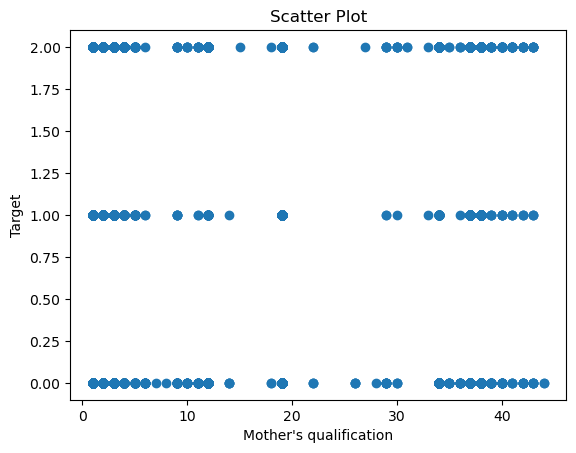

correlation of Father's qualification with target is: -0.012448703207081795


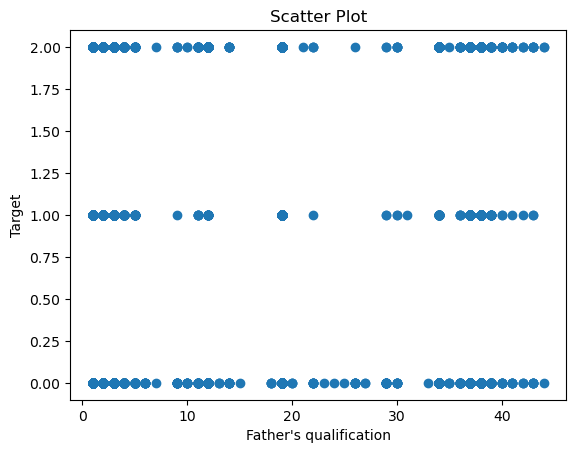

correlation of Mother's occupation with target is: -0.04315650691802542


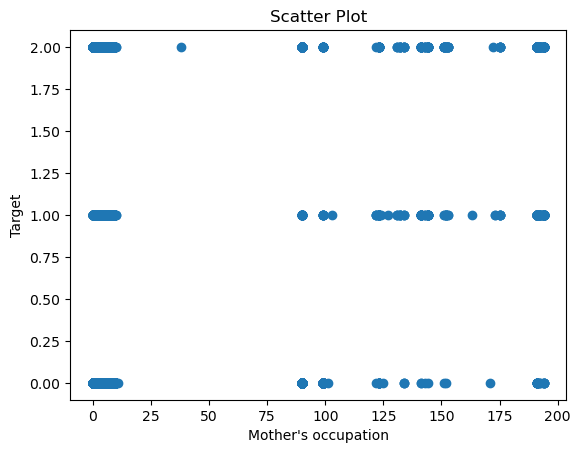

correlation of Father's occupation with target is: -0.03264604598072655


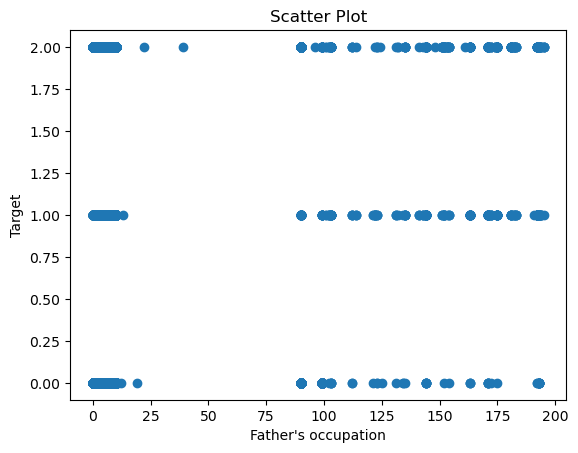

correlation of Admission grade with target is: 0.17288009282126907


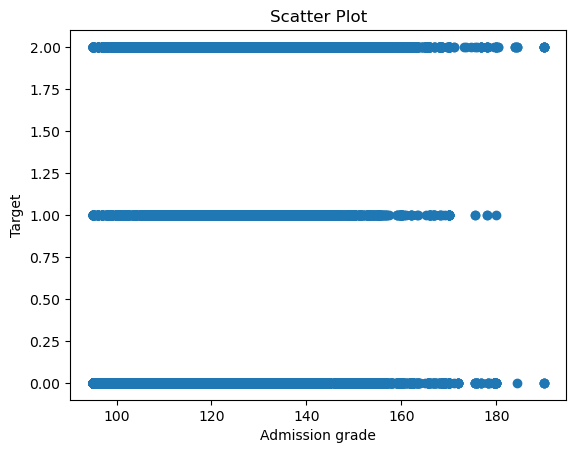

correlation of Displaced with target is: 0.15006593969833618


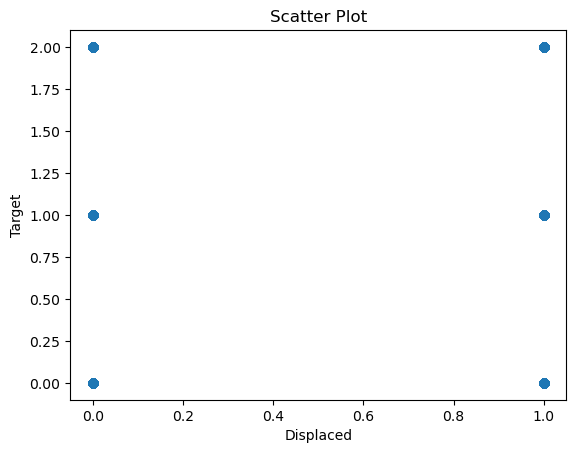

correlation of Educational special needs with target is: -0.000498745356301377


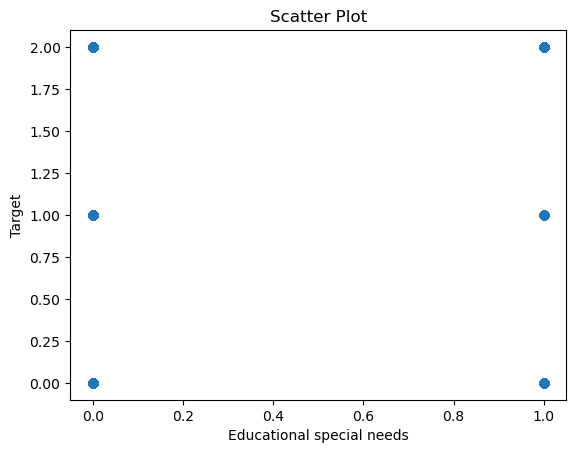

correlation of Debtor with target is: -0.24839126792839697


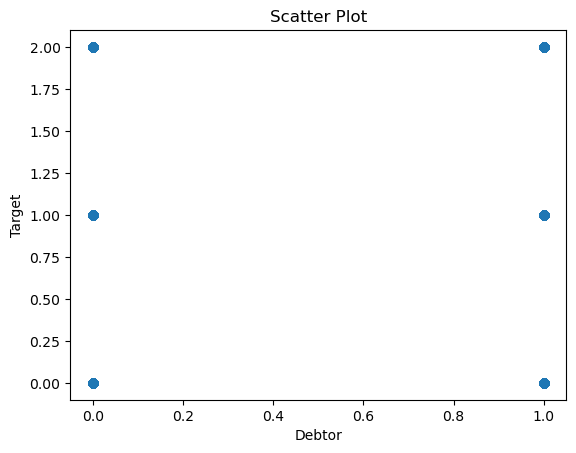

correlation of Tuition fees up to date with target is: 0.41569075415173257


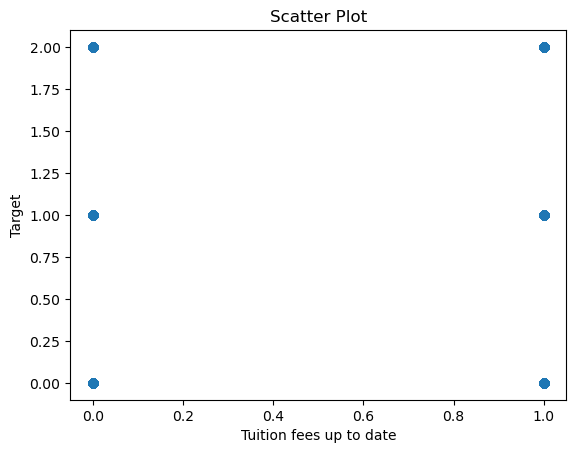

correlation of Gender with target is: -0.3301807300583497


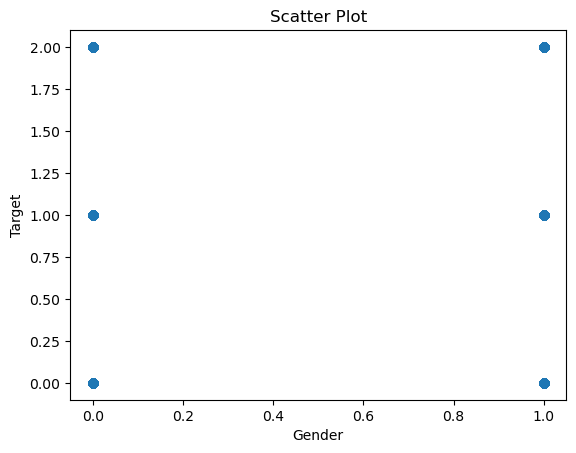

correlation of Scholarship holder with target is: 0.3941243891540634


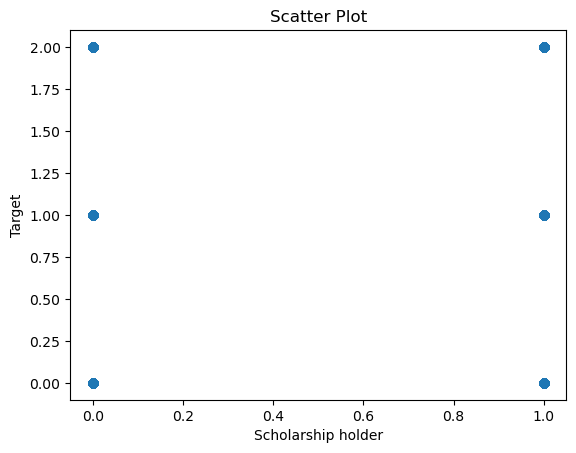

correlation of Age at enrollment with target is: -0.32067930010988865


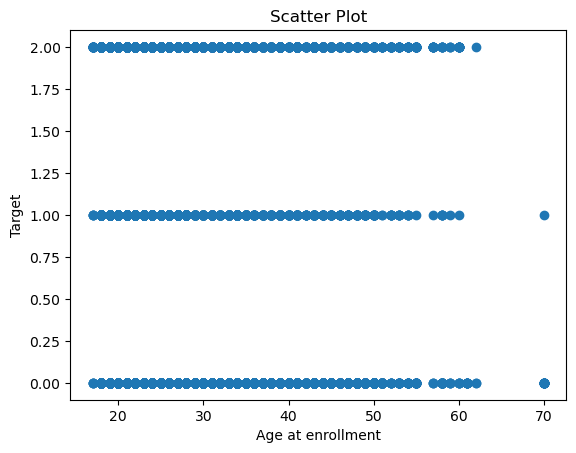

correlation of International with target is: -0.00032599528884725925


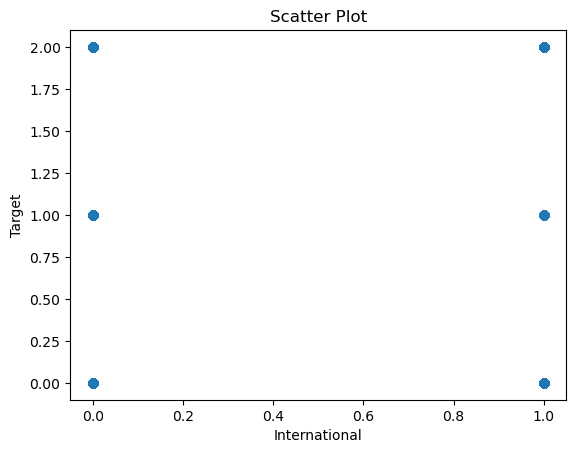

correlation of Curricular units 1st sem (credited) with target is: 0.03576400003416263


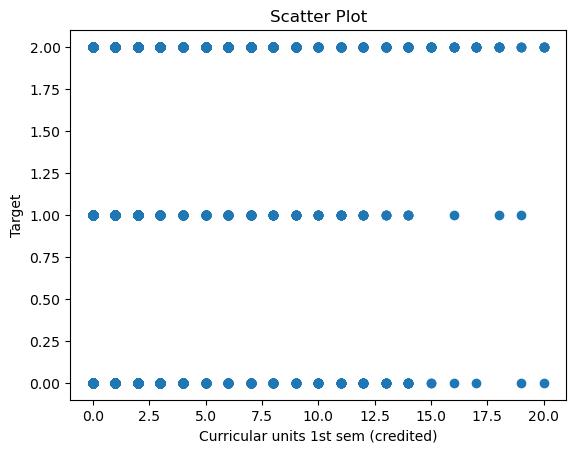

correlation of Curricular units 1st sem (enrolled) with target is: 0.2636568102810638


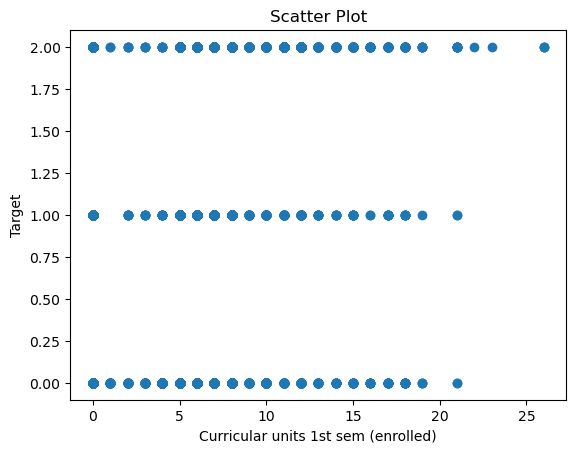

correlation of Curricular units 1st sem (evaluations) with target is: 0.15239792641223276


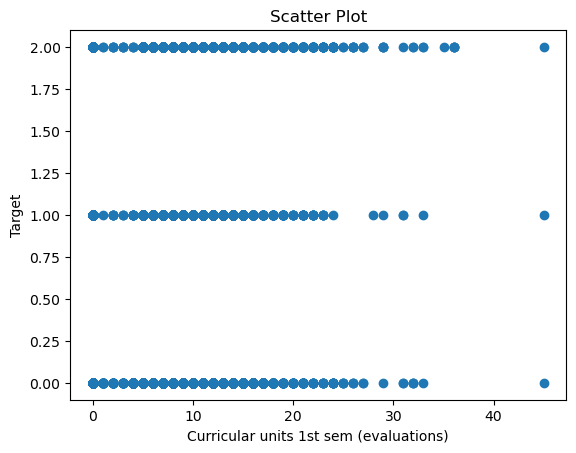

correlation of Curricular units 1st sem (approved) with target is: 0.7254903556449375


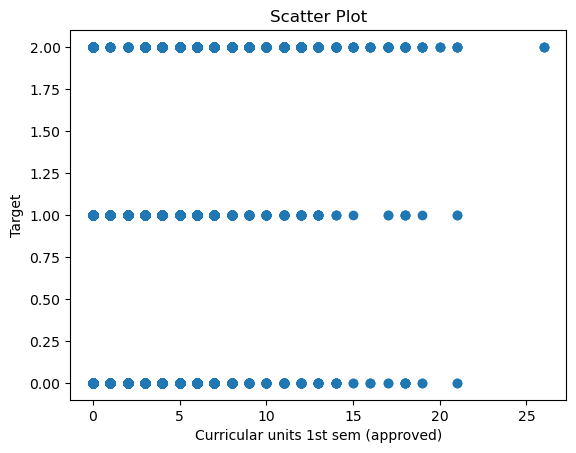

correlation of Curricular units 1st sem (grade) with target is: 0.6613553556675668


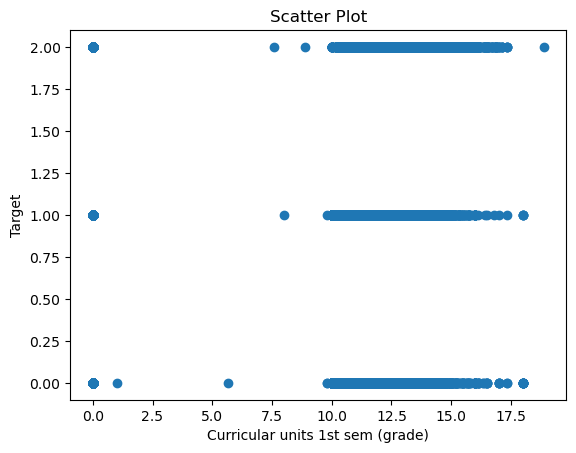

correlation of Curricular units 1st sem (without evaluations) with target is: -0.060941381956199935


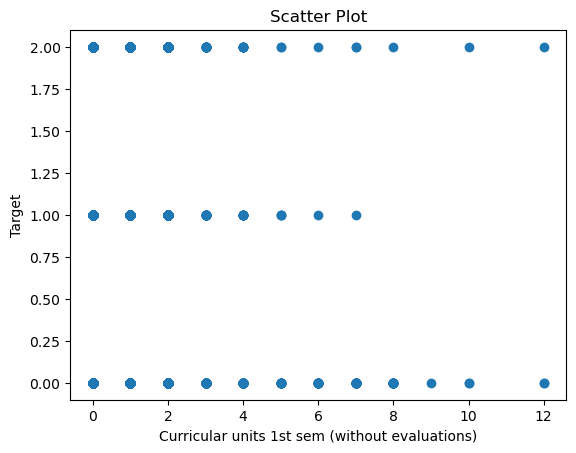

correlation of Curricular units 2nd sem (credited) with target is: 0.03806210332862181


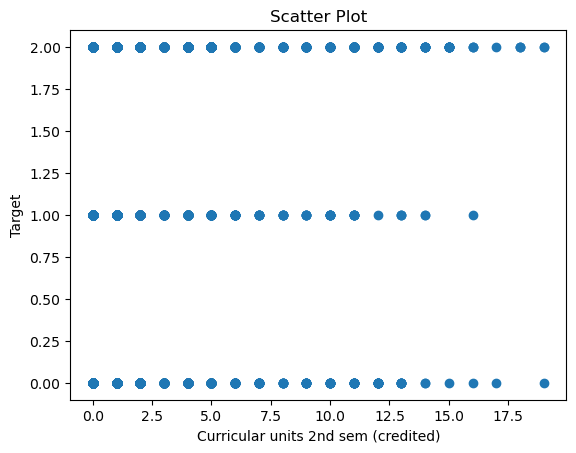

correlation of Curricular units 2nd sem (enrolled) with target is: 0.28916490139057727


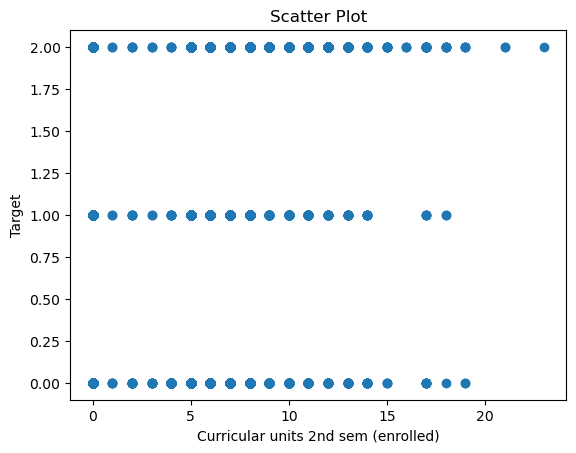

correlation of Curricular units 2nd sem (evaluations) with target is: 0.214950955987597


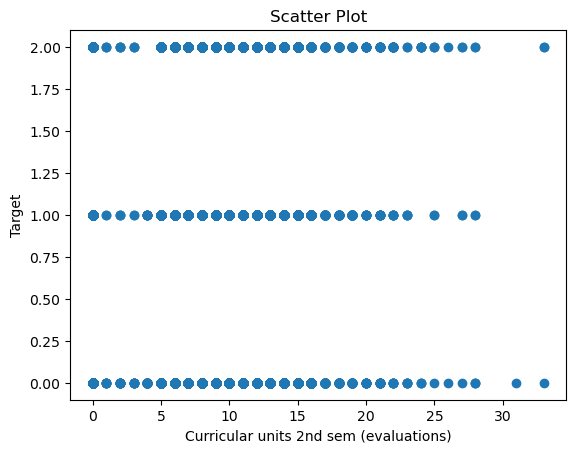

correlation of Curricular units 2nd sem (approved) with target is: 0.7814524402045012


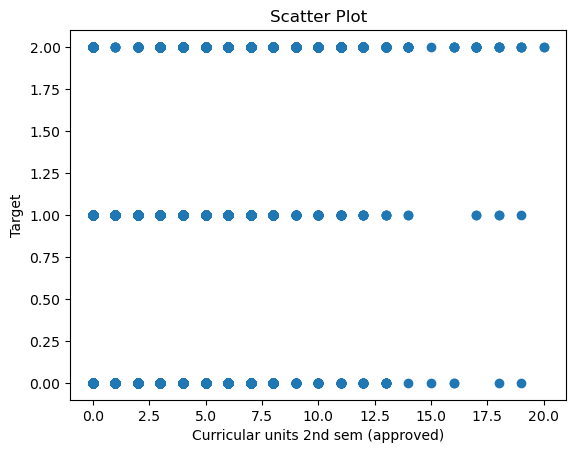

correlation of Curricular units 2nd sem (grade) with target is: 0.7190356505963321


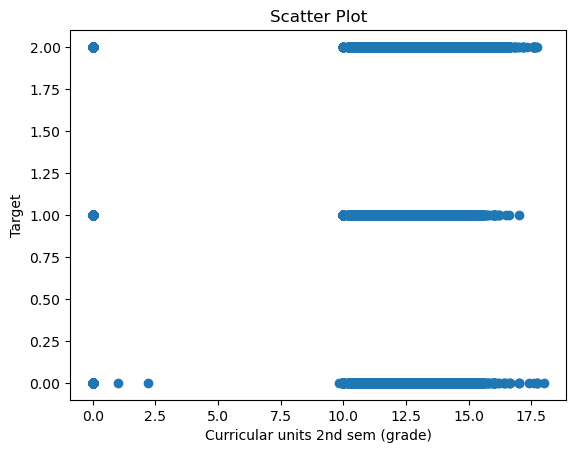

correlation of Curricular units 2nd sem (without evaluations) with target is: -0.07268958120897187


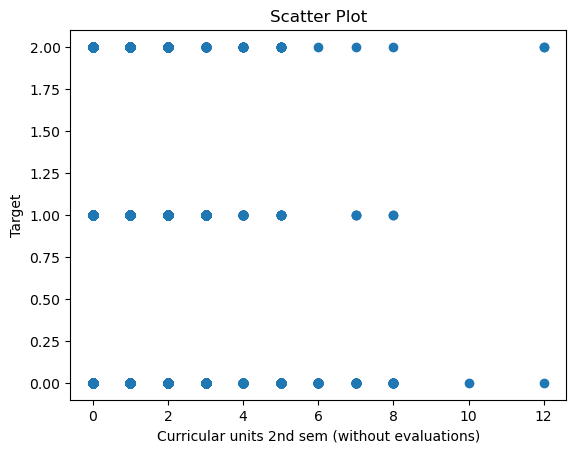

correlation of Unemployment rate with target is: 0.01573060139600765


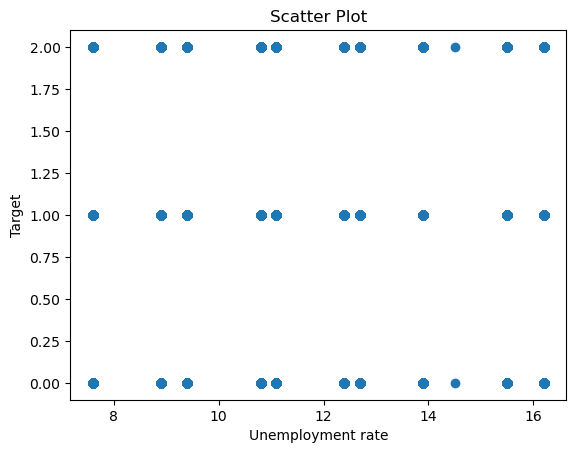

correlation of Inflation rate with target is: -0.03734433563843143


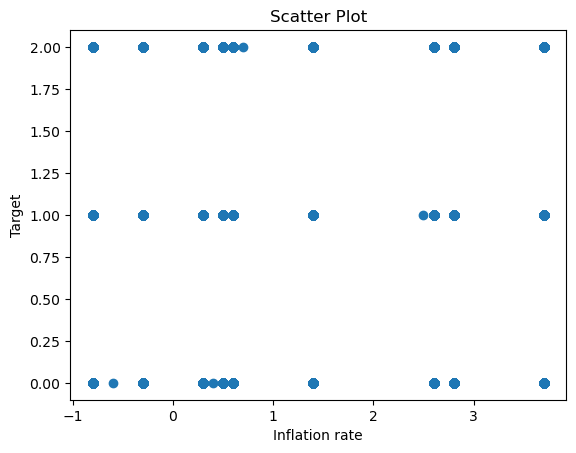

correlation of GDP with target is: 0.10646190566052399


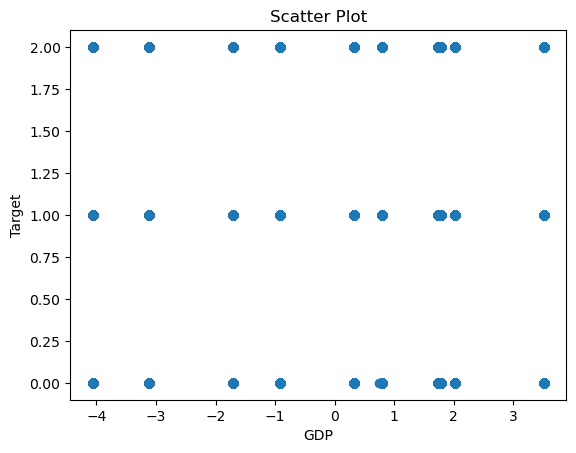

correlation of Target with target is: 1.0


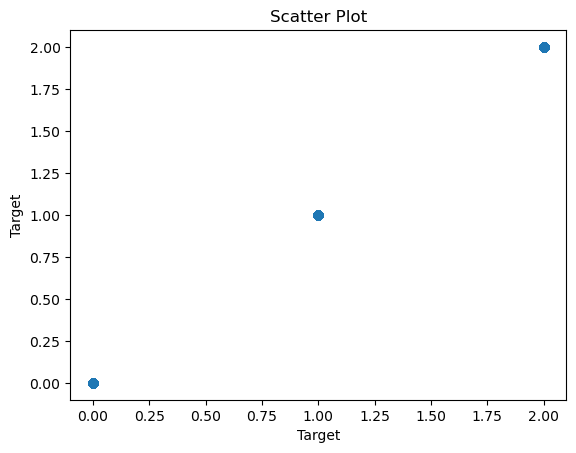

In [21]:

import matplotlib.pyplot as plt
neg_coorelation =[]
for feature in df.columns:
  plt.scatter(df[feature], df['Target'])
  correlation = df[feature].corr(df['Target'], method='pearson')
  print(f"correlation of {feature} with target is: {correlation}")
  if correlation<0:
    neg_coorelation.append(feature)
  plt.xlabel(feature)
  plt.ylabel('Target')
  plt.title('Scatter Plot')
  plt.show()

In [22]:
neg_coorelation

['Marital status',
 'Application mode',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Educational special needs',
 'Debtor',
 'Gender',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (without evaluations)',
 'Inflation rate']